## Pytorch Workflow


In [1]:
what_we_cover = {1: "data prep",
                 2: "build model",
                 3: "fitting the model to data",
                 4: "making predictions",
                 5: "saving and loading model",
                 6: "putting it all"};
what_we_cover

{1: 'data prep',
 2: 'build model',
 3: 'fitting the model to data',
 4: 'making predictions',
 5: 'saving and loading model',
 6: 'putting it all'}

In [2]:
import torch
from torch import nn # contain all pytorch building block
import matplotlib.pyplot as plt



## 1. Data Prep

1. Excel or sps
2. Images
3. Videos
4. Audio
5. DNA
6. Text

ML is a game of 2 parts:
1. Get data into numerical representation
2. Build a model to learn patters in that numerical representation

Linear regression using known **parameter**


In [3]:
# known parameter
weight = 0.7 # b
bias = 0.3 # a

# create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [4]:
# known parameter
weight = 0.7 # b
bias = 0.3 # a

# create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) # add extra dimension
y = weight * X + bias
X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### Splitting data into trainin and test sets

1. Training data (60-80%)
2. Validation (may not used, 10-20%)
3. Test data (10-20%)

In [5]:
# Create train test split
train_split = int(0.8*len(X))
X_train, y_train =X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

## 1.a. Visualizing data

In [6]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions
  """
  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot training data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  #Are there predictions
  if predictions is not None:
    # Plot the prediction if exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

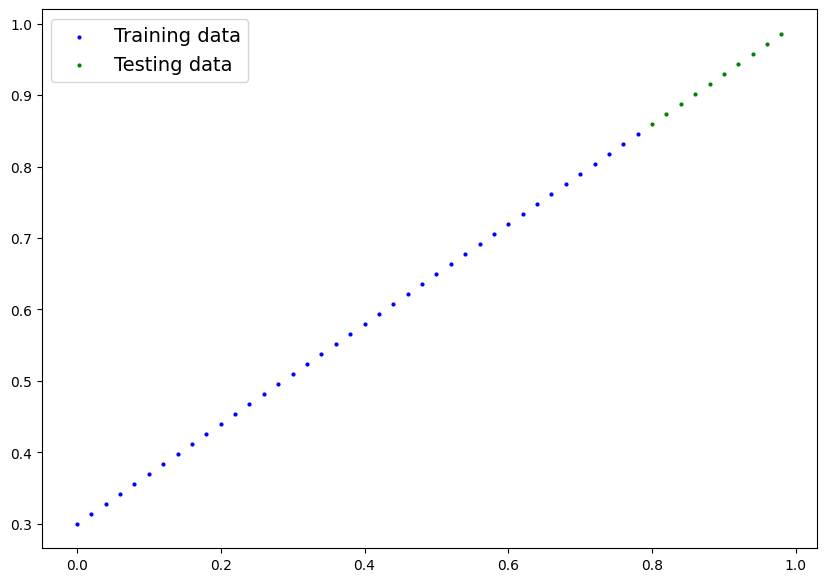

In [7]:
plot_predictions();

## 2. Build Model

What model below does:
1. Start with random values (w & b)
2. Look at training data and adjust the random values to better represent (closet) the ideal values

How?
Through 2 main algorithms
1. Gradient descent (grad = True)
2. backpropagation


In [8]:
#Create linear regression model class
from torch import nn
class LinearRegressionModel(nn.Module): # Almost everything in Pytorch inherite from this
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, # start with random weight and try to adjust it to ideal
                                           requires_grad=True, # update parameter via grad desc
                                           dtype=torch.float)) # data type float 32
    self.bias = nn.Parameter(torch.randn(1,
                                        requires_grad=True,
                                        dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, x: torch.tensor) -> torch.Tensor:
    return self.weights * x + self.bias #this is the linear regresion

### PyTorch model building essentials

1. torch.nn - contain all of building for computational graph
2. torch.nn.Parameter - parameter of our model that try and learn
3. torch.nn.Module - base class for all nn modules, if subclass it, should overwrite forward()
4. torch.optim - optimizer, help with gradient decent
5. def forward() - All nn.module sublasses require to overwrite forward()

### Checking contents of our models

to check our model parameter we use .parameters()



In [9]:
# random seed
torch.manual_seed(42)

# create instance of model (subclass of nn.Module)
model_0 = LinearRegressionModel()

# check out parameter
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
# List  named parameter
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [11]:
weight, bias # most cases we dont even know the ideal values are

(0.7, 0.3)

### Making predictions using 'torch.inference_model()'

lets see ho well it predic y_test based on x_test

when we pass data through our model, its going to run through forward()

In [12]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [13]:
# make prediction with model:
with torch.inference_mode(): #
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [14]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

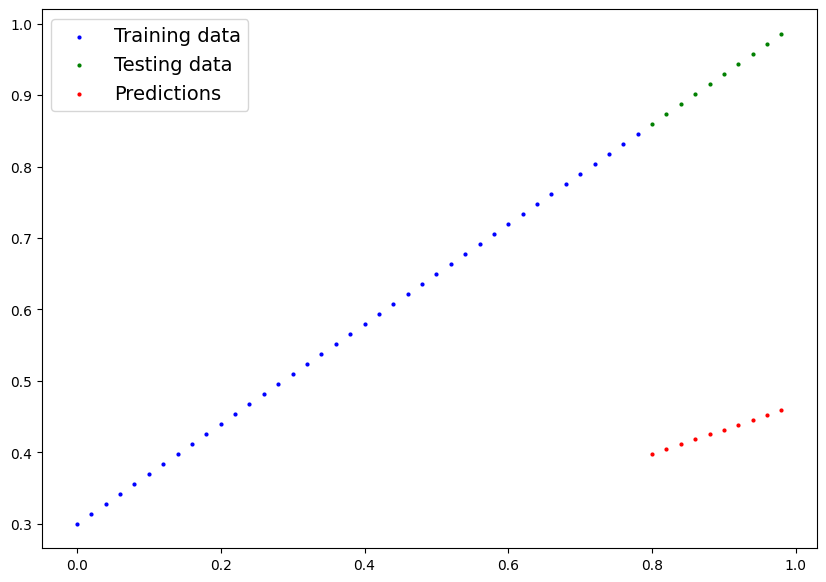

In [15]:
plot_predictions(predictions=y_preds)

## 3. **Training models**:
Moving model from some unkown parameter to known parameter


One way to measure how poor the models are, use a loss function

* Note: loss function / cost function / criterion are the same

Things need to train:
* Loss function: measure how wrong your model prediction, lower = better
* Optimizer: Take into account the loss of a model and adjust the model parameter (weight and bias) to improve loss function

for pytorch:
* Training loop
* Testing loop

In [16]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [17]:
# Check otu our model parameter (a parameter is a value that the model set itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

Mean Absolute Error (MAE)

In [18]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.01) # learning rate = most important hyperparameter you can set, higher lr make it large changes

### Building a training lopp and testing

Needed:
1. Loop through data
2. Forward pass / propagation, involve data moving through our model forward() to make predictions
3. Calculate loss (compare forward pass predictions to ground truth table)
4. Loss backwards (move backwards through network to calculate the gradiens of each parameter of our model with respect to loss)
5. Optimizer step (adjust our model parameter to try and improve the loss)


**gradient = steep of hill**

In [19]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [20]:
# Epoch = 1 loop through data, (hyperparameter because we set it ourself)
epochs = 200

# Tracking
epoch_count = []
loss_values = []
test_loss_values = []

# TRAINING
# 1. Loop through data
for epochs in range(epochs):
  # Set model to training mode
  model_0.train() # Set all parameter that require gradient to require gradient

  # 1. Forward pass
  y_pred = model_0(X_train) # pass data through model

  # 2. Calculate the loss, how wrong the model are
  loss = loss_fn(y_pred, y_train) # y_train = what we want


  # 3. Optimizer zero grad
  optimizer.zero_grad() # gather every epoch, zero them to start new one

  # 4. Perform backpropagation on the loss respect to parameter of model
  loss.backward()

  # 5. Optimizer (gradient descent)
  optimizer.step() # default how optimizer changes will accumulate through the loop, we have to zero them abouve in step 3 for the next iteration


  ### Testing
  model_0.eval()
 # model_0.eval() # turn off different setting in the model not needed for evaluation/test (dropout/batch form)
  with torch.inference_mode(): # turn off gradient tracking
    #still do the forward pass
    test_pred = model_0(X_test)

    # calculate loss
    test_loss = loss_fn(test_pred, y_test)

  if epochs % 10 == 0:
    epoch_count.append(epochs)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

    print(f"Epoch: {epochs} | Test: {loss} | Test loss: {test_loss}")
 # print out model state_dict()
  print(model_0.state_dict())

Epoch: 0 | Test: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])
OrderedDict([('weights', tensor([0.3484])), ('bias', tensor([0.1588]))])
OrderedDict([('weights', tensor([0.3523])), ('bias', tensor([0.1688]))])
OrderedDict([('weights', tensor([0.3562])), ('bias', tensor([0.1788]))])
OrderedDict([('weights', tensor([0.3601])), ('bias', tensor([0.1888]))])
OrderedDict([('weights', tensor([0.3640])), ('bias', tensor([0.1988]))])
OrderedDict([('weights', tensor([0.3679])), ('bias', tensor([0.2088]))])
OrderedDict([('weights', tensor([0.3718])), ('bias', tensor([0.2188]))])
OrderedDict([('weights', tensor([0.3757])), ('bias', tensor([0.2288]))])
Epoch: 10 | Test: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
OrderedDict([('weights', tensor([0.3835])), ('bias', tenso

In [21]:
import matplotlib.pyplot as plt
import numpy as np
np.array(torch.tensor(loss_values).numpy()), test_loss_values
x = np.linspace(0, 10, 20)  # x has 20 elements
y = np.sin(x)

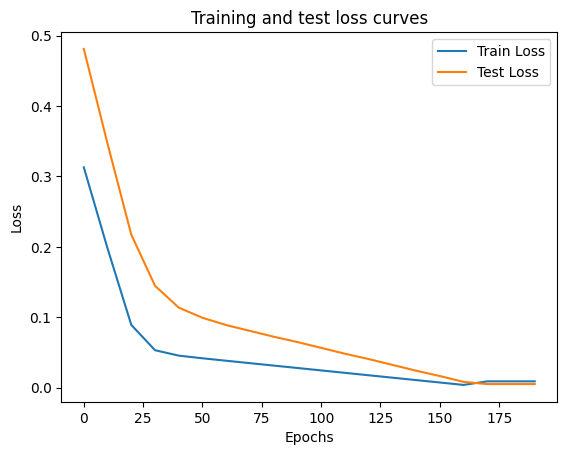

In [22]:
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label = "Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [23]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [24]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [25]:
weight,bias

(0.7, 0.3)

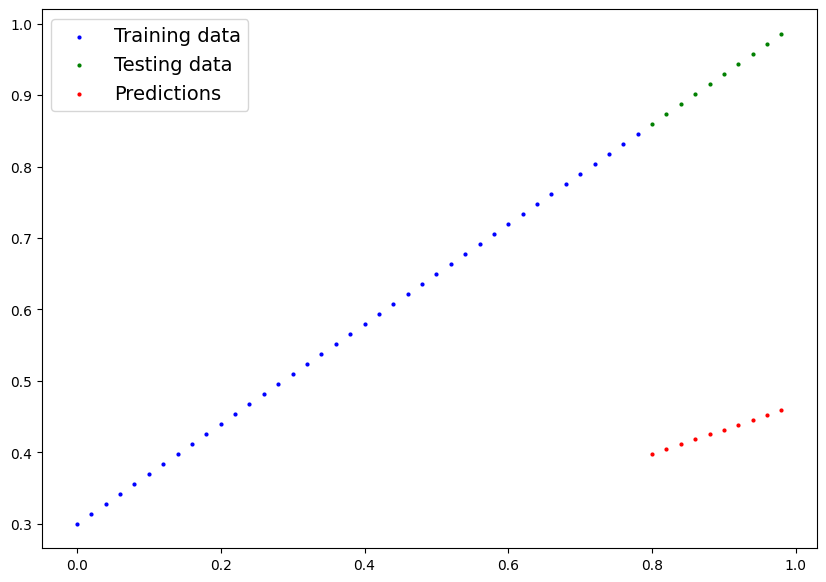

In [26]:
plot_predictions(predictions=y_preds)

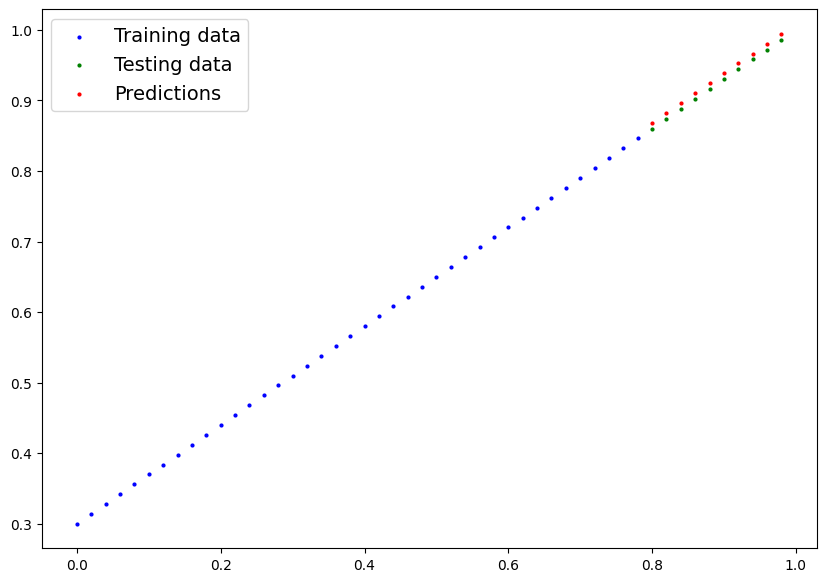

In [27]:
plot_predictions(predictions = y_preds_new)

## Saving a model so its not gone in Colab
1. torch.save() - save pytorch object in python pickle format
2. torch.load() - load a saved pytorch object
3. torch.nn.Module.load_state_dict() - load a model saved state dictionary

In [28]:
# Save pytorch model
from pathlib import Path

# 1. Create model directory
MODEL_PATH = Path("Models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_python_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save model state_dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: Models/01_python_workflow_model_0.pth


In [29]:
!ls -l Models

total 4
-rw-r--r-- 1 root root 1674 May 18 03:31 01_python_workflow_model_0.pth


### Loading PyTroch model

Create new instance of model and load the saved state_dict() into that

In [30]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [31]:
# To load saved statedict, need new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load saved statedict of model_0
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [32]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [33]:
# Make prediction just to test it
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [34]:
# Make some models preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [35]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## Putting All together

In [36]:
# Imprt Pytorch and matplotlib
import torch
import matplotlib.pyplot as plt
from torch import nn

Create device-agnostic code

If we got access to GPU our code will use it (faster)

If not default will be CPU.

In [37]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


### Data

In [38]:
# Create some data using linear regression
# y = weight * X + bias
weight = 0.2
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and Y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without squeeze error will pop up
y = weight * X + bias
X[:10], y[:10] # just for showing the first 10 data of X

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3040],
         [0.3080],
         [0.3120],
         [0.3160],
         [0.3200],
         [0.3240],
         [0.3280],
         [0.3320],
         [0.3360]]))

In [39]:
# Split data
trains_split = int(0.8 *len(X)) # split for training, take 80% of X
X_train, y_train = X[:train_split], y[:train_split] # assigning for train
X_test, y_test = X[train_split:], y[train_split:] # assigning for testing
len(X_train), len(y_train), len(X_test), len(y_test) #showing how many data after split

(40, 40, 10, 10)

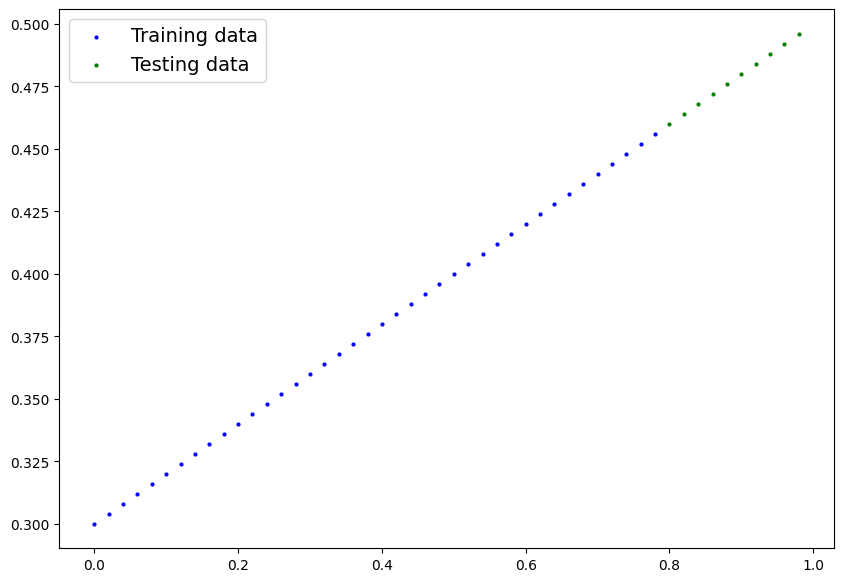

In [40]:
plot_predictions(X_train,y_train,X_test,y_test)

### Building a pytorch linear model

In [51]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.linear() for creating model parameter
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set manual seed for producibility
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [42]:
# Check model current device
next(model_1.parameters()).device

device(type='cpu')

In [43]:
# Set model to use target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### Training
For training we need:
- Loss functions
- Optimizer
- Training loop
- Testing Loop


In [44]:
# Setup loss function
loss_fn = nn.L1Loss() # same as MAE

# Setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr = 0.01)

In [45]:
# Training loop
torch.manual_seed(42)

epochs = 200

# Put data on target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

# Make sure that everything is inside for loop !!!

# Forward Pass
  y_pred = model_1(X_train)

# Calculate loss
  loss = loss_fn(y_pred, y_train)

# Optimizer zero grad
  optimizer.zero_grad()

# Backpropagation
  loss.backward()

# Optimizer step
  optimizer.step()

# Testing
  model_1.eval()

  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  # whats happening
    if epoch % 10 == 0 :
     print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.7501779198646545 | Test loss: 1.0189762115478516
Epoch: 10 | Loss: 0.6349680423736572 | Test loss: 0.8842663764953613
Epoch: 20 | Loss: 0.5197581648826599 | Test loss: 0.7495565414428711
Epoch: 30 | Loss: 0.404548317193985 | Test loss: 0.6148467063903809
Epoch: 40 | Loss: 0.28933843970298767 | Test loss: 0.4801368713378906
Epoch: 50 | Loss: 0.17412856221199036 | Test loss: 0.3454270362854004
Epoch: 60 | Loss: 0.08702736347913742 | Test loss: 0.23119604587554932
Epoch: 70 | Loss: 0.06227988004684448 | Test loss: 0.16920392215251923
Epoch: 80 | Loss: 0.055085599422454834 | Test loss: 0.1381554901599884
Epoch: 90 | Loss: 0.051218386739492416 | Test loss: 0.12306743860244751
Epoch: 100 | Loss: 0.04772838577628136 | Test loss: 0.11204736679792404
Epoch: 110 | Loss: 0.04426398500800133 | Test loss: 0.10240109264850616
Epoch: 120 | Loss: 0.04083552211523056 | Test loss: 0.09481551498174667
Epoch: 130 | Loss: 0.03739916533231735 | Test loss: 0.08654303103685379
Epoch: 140 | 

### Making and evaluating predictions

In [1]:
# Turn model into evaluation model
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_pred = model_1(X_test)

y_preds

NameError: name 'model_1' is not defined

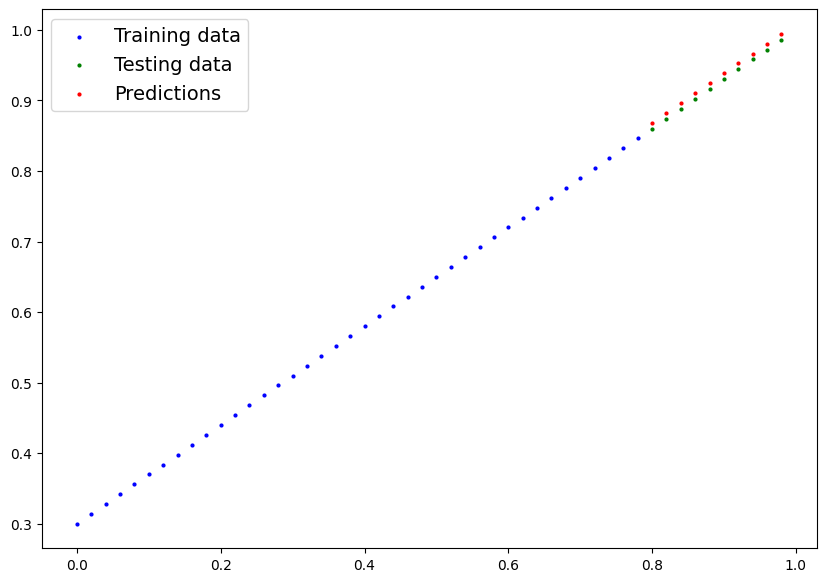

In [47]:
plot_predictions(predictions=y_preds.cpu())

### Save the model

In [48]:
from pathlib import Path

# Create model directory
MODEL_PATH = Path("Models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save path
MODEL_NAME = "01_Pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: Models/01_Pytorch_workflow_model_1.pth


In [49]:
# Load pytorch model

# Create a new instance of linear regression model V2
loaded_model_1 = LinearRegressionModelV2()

# Loaded the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [50]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

## Excercises
https://www.learnpytorch.io/01_pytorch_workflow/